In [56]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import math
from sklearn.preprocessing import StandardScaler
from sympy import Point, Line

In [57]:
%config IPCompleter.greedy=True

In [58]:
df = pd.read_csv('~/MasterThesis/Data/iris.csv')

In [59]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Encode String Attribute to Integer**

In [60]:
enc = LabelEncoder()
enc.fit(df['species'])
df['species']= enc.transform(df['species'])

**feature scaling**

In [61]:
scaler = StandardScaler()
sample=scaler.fit_transform(df.iloc[:,0:4])

**Elbow Implimentation with Root Mean Squared Standered Deviation**

In [62]:
RMSSTD={}
K = range(1,10)
for k in K :
    RMSSTD[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    for i in range(0,k):
        cluster_datapoints = pd.DataFrame(sample[labels==i])
        #print(cluster_datapoints.head())
        
        #Mean Value of each dimention of datapoints in this cluster
        cluster_mean = cluster_datapoints.mean(axis=0)
        print("Cluster Mean= "+str(cluster_mean))
        
        for index,row in cluster_datapoints.iterrows():
            err = cdist(row[np.newaxis,:],cluster_mean[np.newaxis,:], 'minkowski',p=2)
            RMSSTD[k]=RMSSTD[k]+err
    #Calculate the mean error for entire dataset
    RMSSTD[k]=((RMSSTD[k]/len(sample))[0])[0]
    print("RMSSTD = "+str(RMSSTD))

Cluster Mean= 0   -2.775558e-16
1   -5.140333e-16
2    1.154632e-16
3    9.251859e-16
dtype: float64
RMSSTD = {1: 1.8646205767971837}
Cluster Mean= 0   -1.014579
1    0.842307
2   -1.304878
3   -1.255129
dtype: float64
Cluster Mean= 0    0.507289
1   -0.421153
2    0.652439
3    0.627564
dtype: float64
RMSSTD = {1: 1.8646205767971837, 2: 1.0642507146657962}
Cluster Mean= 0    1.135970
1    0.096598
2    0.996271
3    1.017172
dtype: float64
Cluster Mean= 0   -1.014579
1    0.842307
2   -1.304878
3   -1.255129
dtype: float64
Cluster Mean= 0   -0.050220
1   -0.880292
2    0.347532
3    0.282063
dtype: float64
RMSSTD = {1: 1.8646205767971837, 2: 1.0642507146657962, 3: 0.8641044156939248}
Cluster Mean= 0   -0.011396
1   -0.872885
2    0.376884
3    0.311654
dtype: float64
Cluster Mean= 0   -0.734636
1    1.452011
2   -1.297044
3   -1.210720
dtype: float64
Cluster Mean= 0    1.167434
1    0.153778
2    1.003145
3    1.029633
dtype: float64
Cluster Mean= 0   -1.343207
1    0.126567
2   -1.31

**Ploting Elbow**

In [63]:
SSE_array=[]
slope=[]
for key,value in RMSSTD.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[1.8646205767971837, 1.0642507146657962, 0.8641044156939248, 0.7786038771432575, 0.6969941472657701, 0.6578634316790751, 0.6130129134467118, 0.5733641346970204, 0.5345877082342438]


[[2, -0.8003698621313875],
 [3, -0.20014629897187142],
 [4, -0.0855005385506673],
 [5, -0.08160972987748738],
 [6, -0.03913071558669501],
 [7, -0.0448505182323633],
 [8, -0.039648778749691416],
 [9, -0.03877642646277657]]

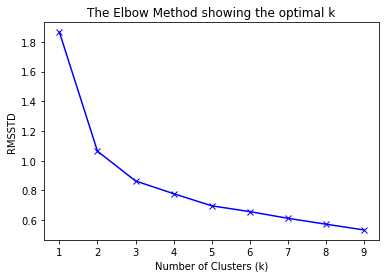

In [64]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('RMSSTD')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [65]:
slope

[[2, -0.8003698621313875],
 [3, -0.20014629897187142],
 [4, -0.0855005385506673],
 [5, -0.08160972987748738],
 [6, -0.03913071558669501],
 [7, -0.0448505182323633],
 [8, -0.039648778749691416],
 [9, -0.03877642646277657]]

In [66]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 5


In [67]:
distances=[]
for i in range(0,9):
    p1=Point(1,SSE_array[0])
    p2=Point(9,SSE_array[8])
    l1 = Line(p1,p2)
    p=Point(i+1,SSE_array[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+1))

Optimal number 0f clusters = 3
